In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import joblib

# DATA PROCESSING

In [2]:
df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df.shape

(307511, 122)

In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
df["CODE_GENDER"].unique()


array(['M', 'F', 'XNA'], dtype=object)

In [9]:
df["ORGANIZATION_TYPE"].unique()


array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [10]:
df["CNT_CHILDREN"].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6,  8,  9, 11, 12, 10, 19, 14],
      dtype=int64)

In [11]:
df["NAME_TYPE_SUITE"].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [12]:
df = df.dropna(subset=['CNT_FAM_MEMBERS'])

In [13]:
df["NAME_INCOME_TYPE"].unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
       'Unemployed', 'Student', 'Businessman', 'Maternity leave'],
      dtype=object)

In [14]:
df["NAME_EDUCATION_TYPE"].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [15]:
df["NAME_FAMILY_STATUS"].unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated'], dtype=object)

In [16]:

unknown_count = (df["NAME_FAMILY_STATUS"] == "Unknown").sum()

print(unknown_count)


0


In [17]:
df["OCCUPATION_TYPE"].isnull().sum()

96391

In [18]:
df = df.dropna(subset=['OCCUPATION_TYPE'])

In [19]:
df["OCCUPATION_TYPE"].isnull().sum()

0

In [20]:
df["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 211118 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 198.1+ MB


In [22]:
df["NAME_HOUSING_TYPE"].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'],
      dtype=object)

In [23]:
df['AMT_INCOME_TOTAL'].mean()

175773.74096140548

In [24]:
data_columns = df.columns.tolist()

columns = []

with open('column_names.txt', 'w') as f:
    for column in data_columns:
        values = f'{column}: {df[column].isnull().sum()}: {df[column].dtype}'
        columns.append(values)

In [25]:
columns


['SK_ID_CURR: 0: int64',
 'TARGET: 0: int64',
 'NAME_CONTRACT_TYPE: 0: object',
 'CODE_GENDER: 0: object',
 'FLAG_OWN_CAR: 0: object',
 'FLAG_OWN_REALTY: 0: object',
 'CNT_CHILDREN: 0: int64',
 'AMT_INCOME_TOTAL: 0: float64',
 'AMT_CREDIT: 0: float64',
 'AMT_ANNUITY: 12: float64',
 'AMT_GOODS_PRICE: 219: float64',
 'NAME_TYPE_SUITE: 905: object',
 'NAME_INCOME_TYPE: 0: object',
 'NAME_EDUCATION_TYPE: 0: object',
 'NAME_FAMILY_STATUS: 0: object',
 'NAME_HOUSING_TYPE: 0: object',
 'REGION_POPULATION_RELATIVE: 0: float64',
 'DAYS_BIRTH: 0: int64',
 'DAYS_EMPLOYED: 0: int64',
 'DAYS_REGISTRATION: 0: float64',
 'DAYS_ID_PUBLISH: 0: int64',
 'OWN_CAR_AGE: 130941: float64',
 'FLAG_MOBIL: 0: int64',
 'FLAG_EMP_PHONE: 0: int64',
 'FLAG_WORK_PHONE: 0: int64',
 'FLAG_CONT_MOBILE: 0: int64',
 'FLAG_PHONE: 0: int64',
 'FLAG_EMAIL: 0: int64',
 'OCCUPATION_TYPE: 0: object',
 'CNT_FAM_MEMBERS: 0: float64',
 'REGION_RATING_CLIENT: 0: int64',
 'REGION_RATING_CLIENT_W_CITY: 0: int64',
 'WEEKDAY_APPR_PROC

In [26]:
df.shape

(211118, 122)

In [27]:
correlation = []

with open('column_names.txt', 'w') as f:
    for column in data_columns:
        if df[column].dtype == 'int64' or df[column].dtype == 'float64':
            correlation.append(f"{column}: {df[column].corr(df['TARGET'])}")

In [28]:
correlation

['SK_ID_CURR: -0.0019555724180334083',
 'TARGET: 1.0',
 'CNT_CHILDREN: 0.007994816292105328',
 'AMT_INCOME_TOTAL: -0.0053659406266968815',
 'AMT_CREDIT: -0.04077864596627971',
 'AMT_ANNUITY: -0.019408266480708192',
 'AMT_GOODS_PRICE: -0.05061363087705287',
 'REGION_POPULATION_RELATIVE: -0.039622575499878736',
 'DAYS_BIRTH: 0.06590134827110848',
 'DAYS_EMPLOYED: 0.06815895123871461',
 'DAYS_REGISTRATION: 0.03729148387523293',
 'DAYS_ID_PUBLISH: 0.0400065624250336',
 'OWN_CAR_AGE: 0.040186913110226534',
 'FLAG_MOBIL: nan',
 'FLAG_EMP_PHONE: -7.797216159775752e-05',
 'FLAG_WORK_PHONE: 0.01959114164684724',
 'FLAG_CONT_MOBILE: 0.0006186138761240199',
 'FLAG_PHONE: -0.02482183448005144',
 'FLAG_EMAIL: -0.007116214027101587',
 'CNT_FAM_MEMBERS: -0.0018727297333827094',
 'REGION_RATING_CLIENT: 0.06388380184949946',
 'REGION_RATING_CLIENT_W_CITY: 0.06626530819352416',
 'HOUR_APPR_PROCESS_START: -0.030125135549331977',
 'REG_REGION_NOT_LIVE_REGION: 0.005001427562907612',
 'REG_REGION_NOT_WORK_R

# Graph Undersanding

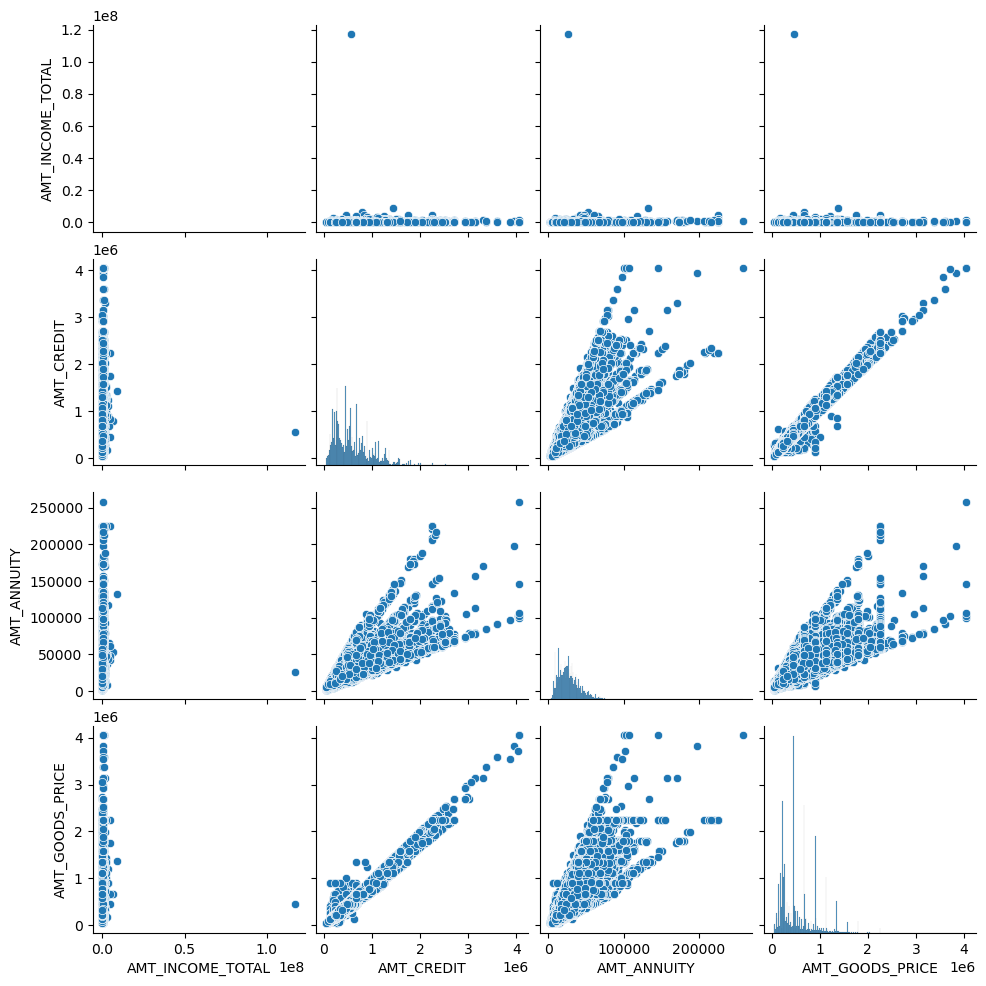

In [29]:
columns_of_interest = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
sns.pairplot(df[columns_of_interest])
plt.show()

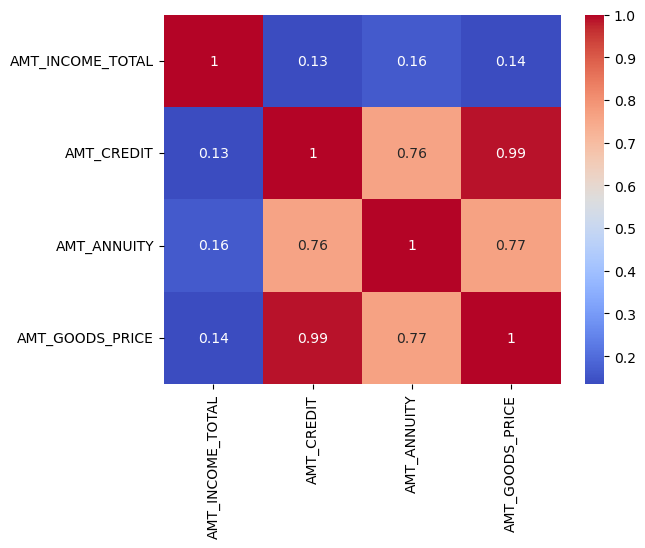

In [30]:
correlation_matrix = df[columns_of_interest].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<Axes: >

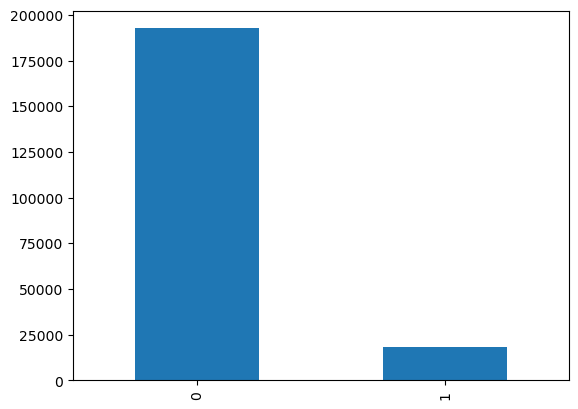

In [31]:
df['TARGET'].value_counts().plot(kind='bar')

In [32]:
df['TARGET'].value_counts()

0    192571
1     18547
Name: TARGET, dtype: int64

<Axes: xlabel='NAME_CONTRACT_TYPE', ylabel='TARGET'>

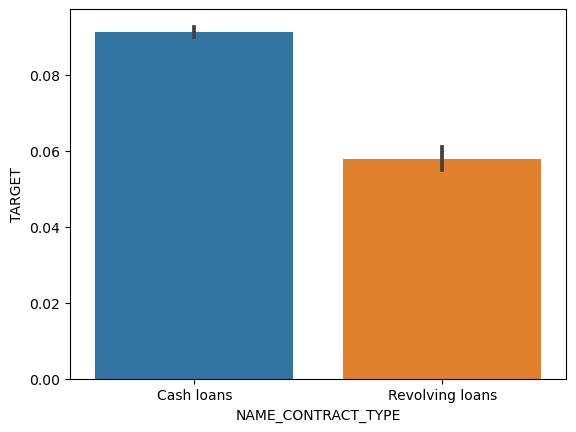

In [33]:
sns.barplot(x=df['NAME_CONTRACT_TYPE'], y=df['TARGET'])

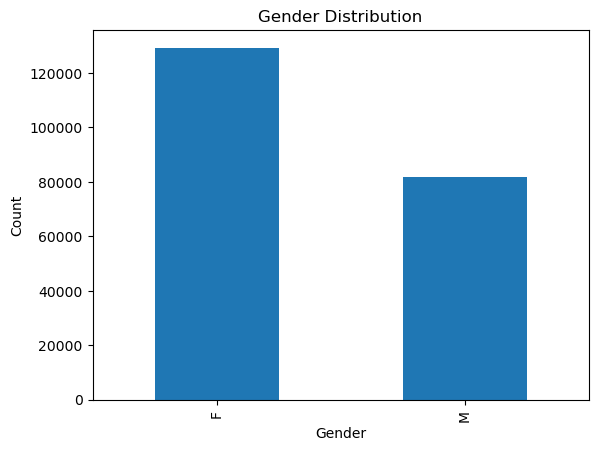

In [34]:
filtered_df = df[df['CODE_GENDER'].isin(['M', 'F'])]
gender_counts = filtered_df['CODE_GENDER'].value_counts()
gender_counts.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

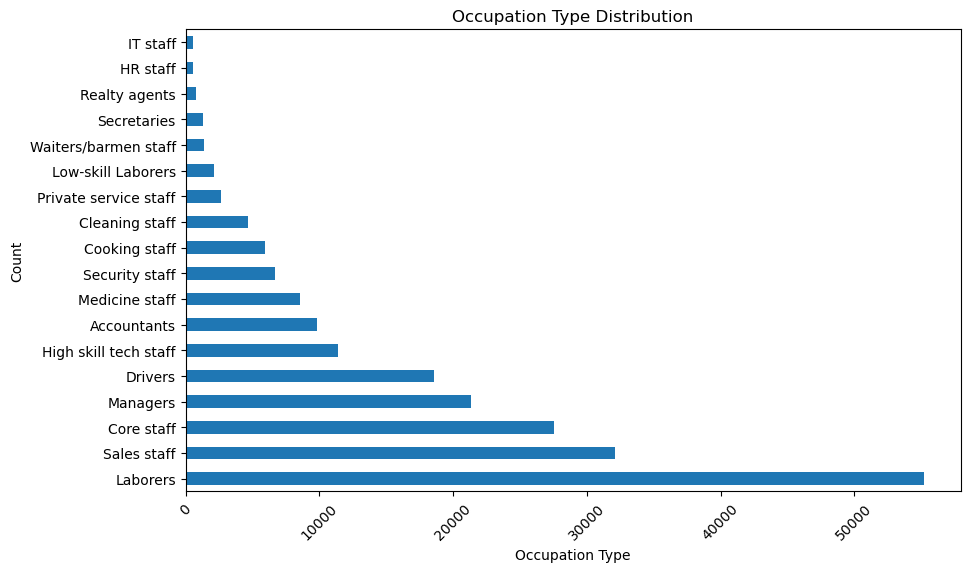

In [35]:
occupation_counts = df['OCCUPATION_TYPE'].value_counts()
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='barh')
plt.title('Occupation Type Distribution')
plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

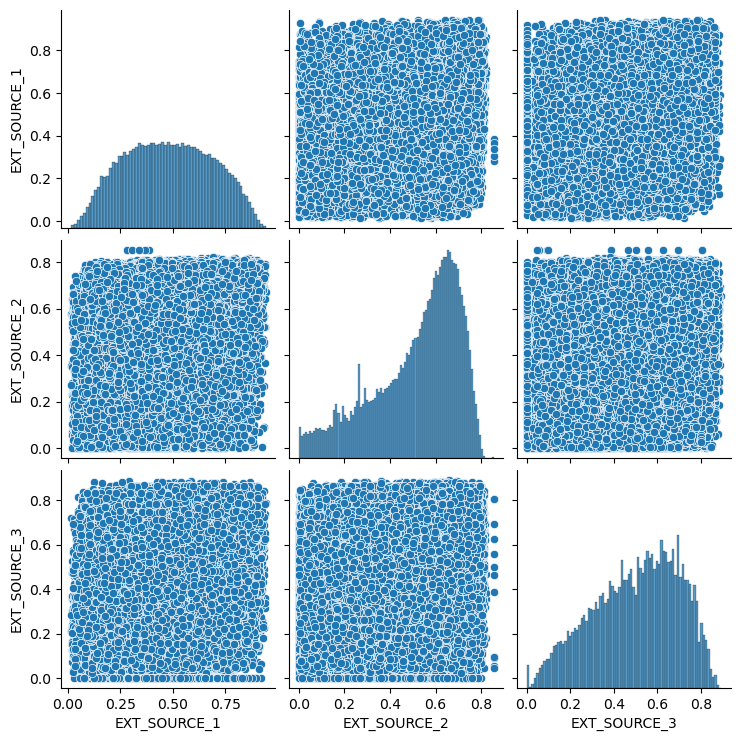

In [36]:
columns_of_interest = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
sns.pairplot(df[columns_of_interest])
plt.show()

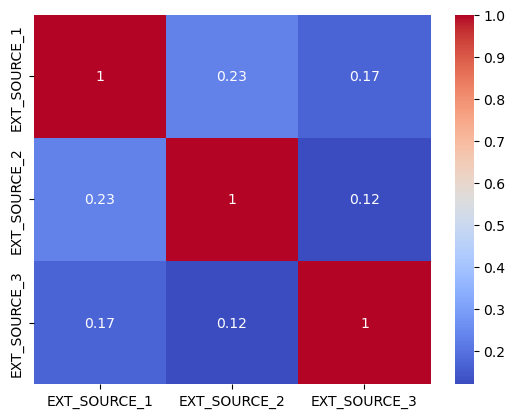

In [37]:

correlation_matrix = df[columns_of_interest].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


## Female Credit Card Analysis

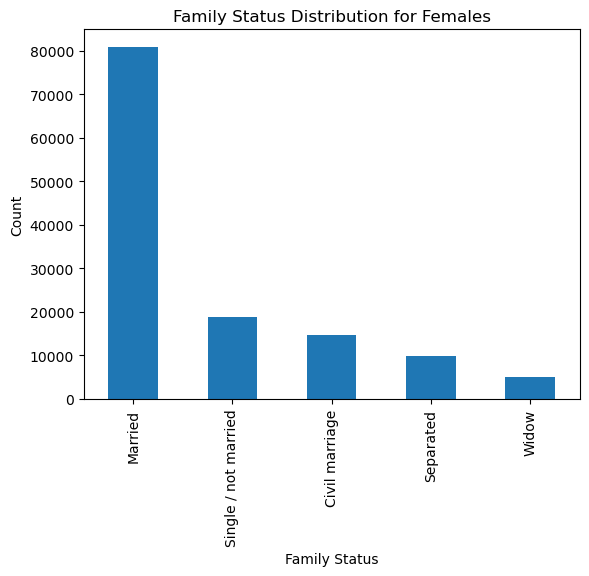

In [38]:
filtered_df = df[(df['CODE_GENDER'] == 'F') & (df['NAME_FAMILY_STATUS'] != 'Unknown')]
family_status_counts = filtered_df['NAME_FAMILY_STATUS'].value_counts()
family_status_counts.plot(kind='bar')
plt.title('Family Status Distribution for Females')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.show()

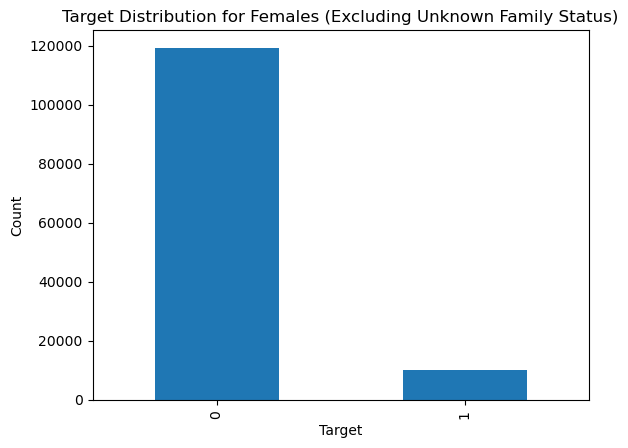

In [39]:
target_counts = filtered_df['TARGET'].value_counts()
target_counts.plot(kind='bar')
plt.title('Target Distribution for Females (Excluding Unknown Family Status)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

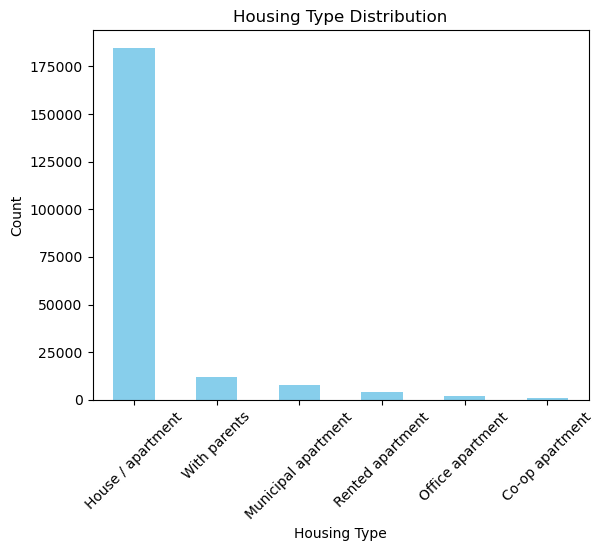

In [40]:
housing_type_counts = df['NAME_HOUSING_TYPE'].value_counts()
housing_type_counts.plot(kind='bar', color='skyblue')
plt.title('Housing Type Distribution')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

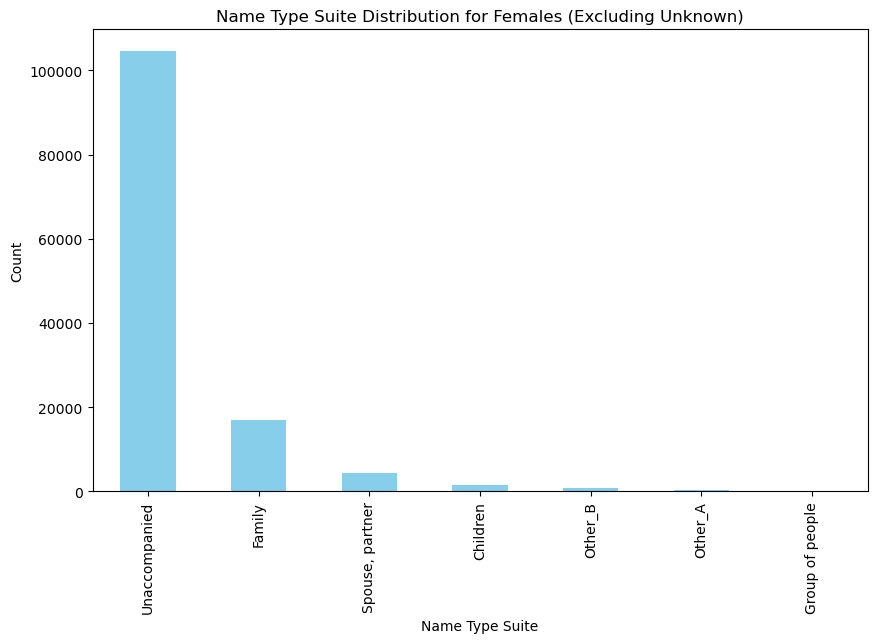

In [41]:
suite_type_counts = filtered_df['NAME_TYPE_SUITE'].value_counts()
plt.figure(figsize=(10, 6))
suite_type_counts.plot(kind='bar', color='skyblue')
plt.title('Name Type Suite Distribution for Females (Excluding Unknown)')
plt.xlabel('Name Type Suite')
plt.ylabel('Count')
plt.show()

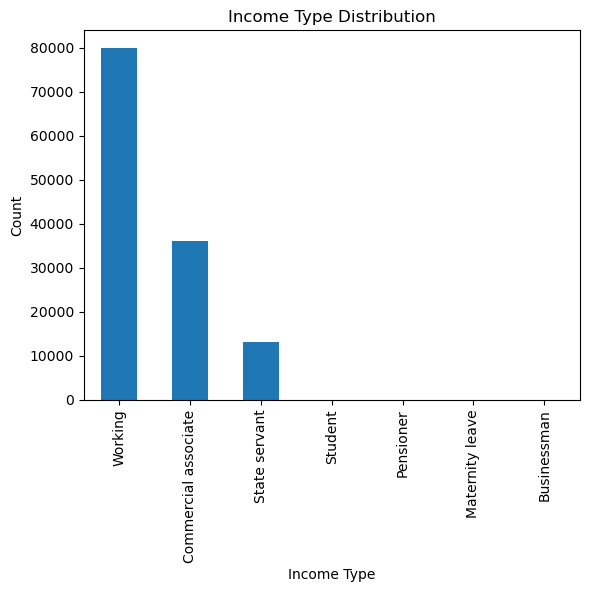

In [42]:
income_type_counts = filtered_df['NAME_INCOME_TYPE'].value_counts()
income_type_counts.plot(kind='bar')
plt.title('Income Type Distribution')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.show()

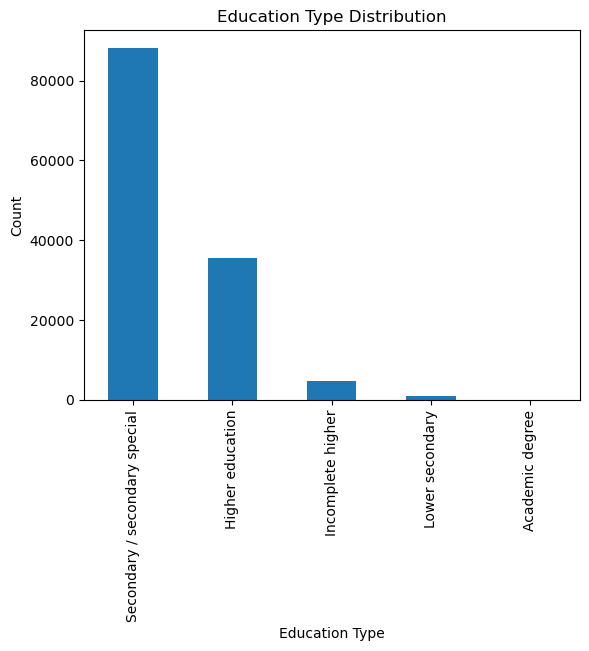

In [43]:
education_type_counts = filtered_df['NAME_EDUCATION_TYPE'].value_counts()
education_type_counts.plot(kind='bar')
plt.title('Education Type Distribution')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.show()

## Male Analysis 

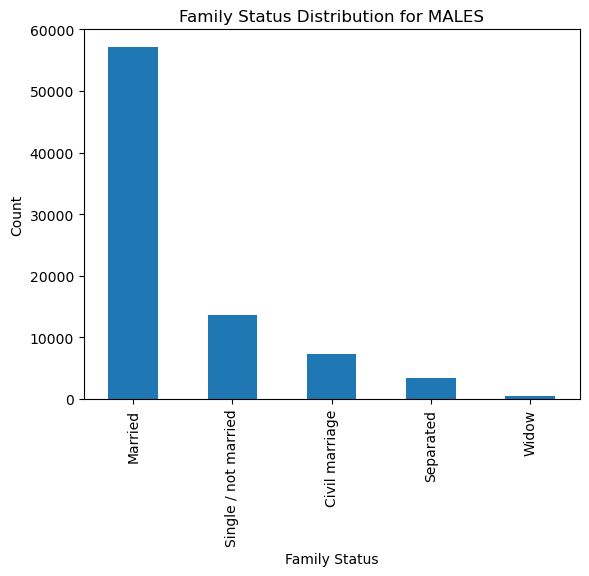

In [44]:
filtered_df = df[(df['CODE_GENDER'] == 'M') & (df['NAME_FAMILY_STATUS'] != 'Unknown')]
family_status_counts = filtered_df['NAME_FAMILY_STATUS'].value_counts()
family_status_counts.plot(kind='bar')
plt.title('Family Status Distribution for MALES')
plt.xlabel('Family Status')
plt.ylabel('Count')
plt.show()

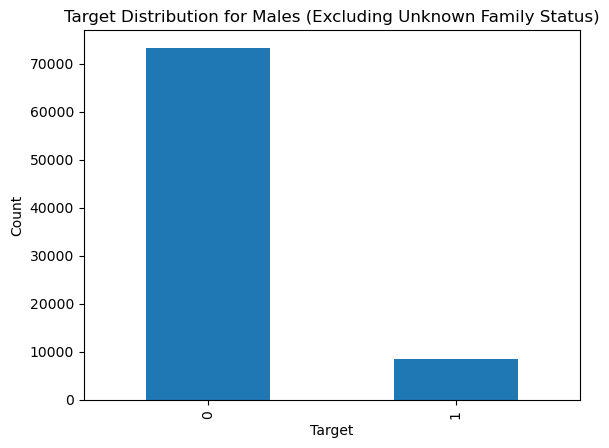

In [45]:
target_counts = filtered_df['TARGET'].value_counts()
target_counts.plot(kind='bar')
plt.title('Target Distribution for Males (Excluding Unknown Family Status)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

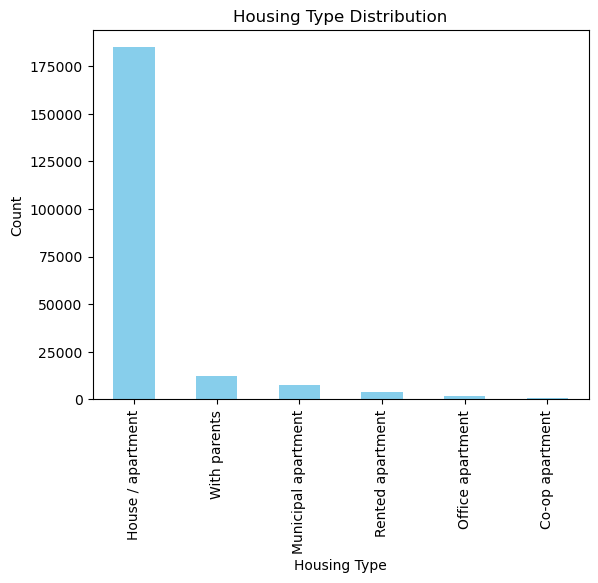

In [46]:
housing_type_counts = df['NAME_HOUSING_TYPE'].value_counts()
housing_type_counts.plot(kind='bar', color='skyblue')
plt.title('Housing Type Distribution')
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.show()

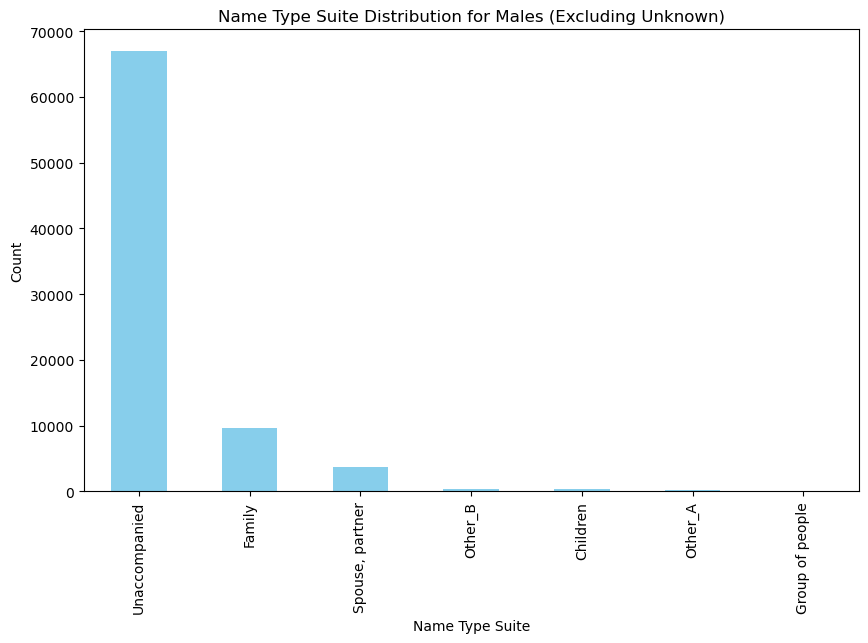

In [47]:
suite_type_counts = filtered_df['NAME_TYPE_SUITE'].value_counts()
plt.figure(figsize=(10, 6))
suite_type_counts.plot(kind='bar', color='skyblue')
plt.title('Name Type Suite Distribution for Males (Excluding Unknown)')
plt.xlabel('Name Type Suite')
plt.ylabel('Count')
plt.show()

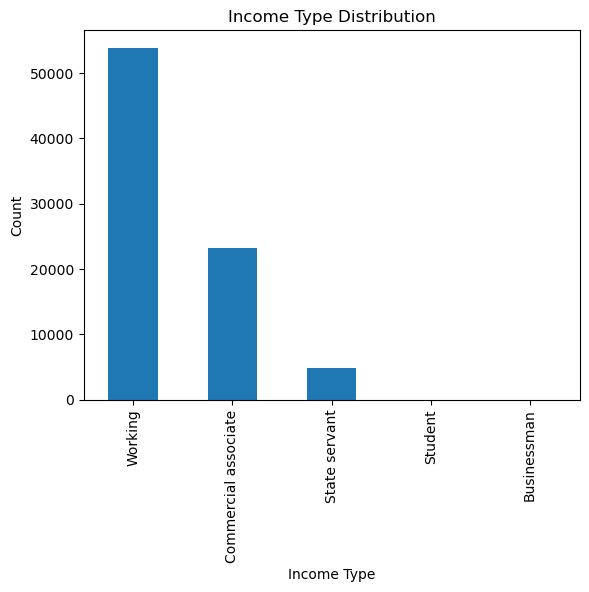

In [48]:
income_type_counts = filtered_df['NAME_INCOME_TYPE'].value_counts()
income_type_counts.plot(kind='bar')
plt.title('Income Type Distribution')
plt.xlabel('Income Type')
plt.ylabel('Count')
plt.show()

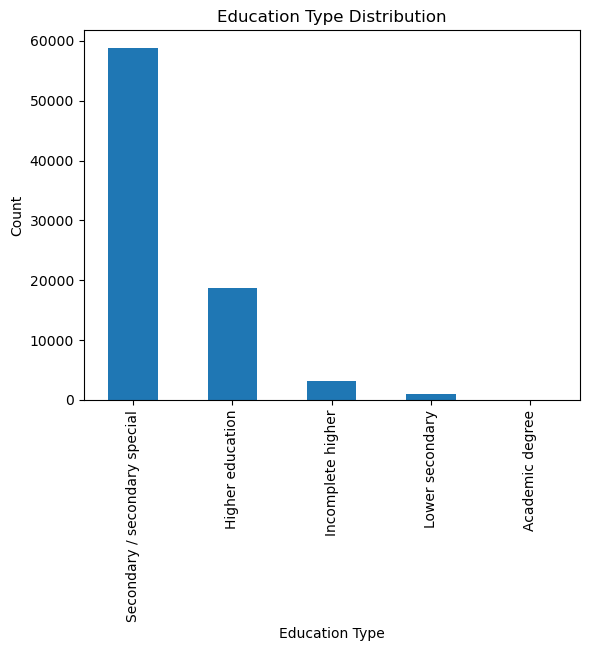

In [49]:
education_type_counts = filtered_df['NAME_EDUCATION_TYPE'].value_counts()
education_type_counts.plot(kind='bar')
plt.title('Education Type Distribution')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.show()

### Conclusion

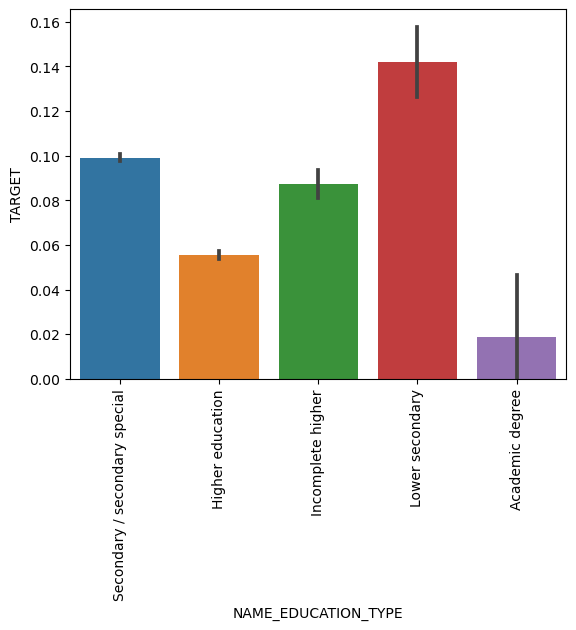

In [50]:
sns.barplot(x=df['NAME_EDUCATION_TYPE'], y=df['TARGET'])
plt.xticks(rotation='vertical')
plt.show()

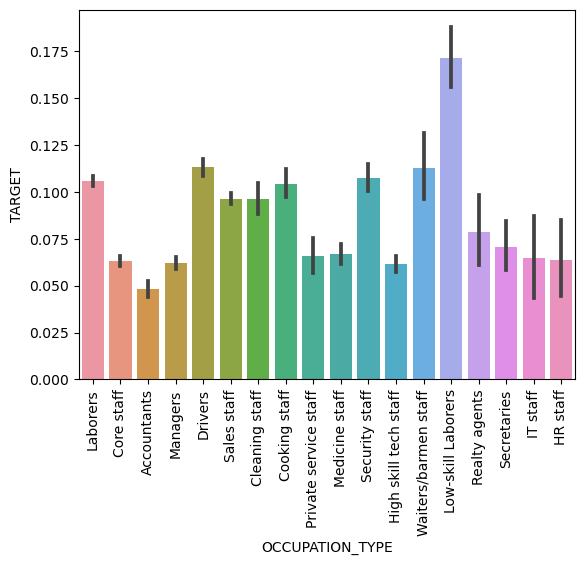

In [51]:
sns.barplot(x=df['OCCUPATION_TYPE'], y=df['TARGET'])
plt.xticks(rotation='vertical')
plt.show()

# Feature Scaling

In [52]:
df = df[['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'AMT_INCOME_TOTAL', 
             'AMT_CREDIT', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 
             'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'DAYS_LAST_PHONE_CHANGE']]

In [53]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_EDUCATION_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REG_REGION_NOT_WORK_REGION,DAYS_LAST_PHONE_CHANGE
0,1,Cash loans,M,N,202500.0,406597.5,Secondary / secondary special,Laborers,1.0,2,0,-1134.0
1,0,Cash loans,F,N,270000.0,1293502.5,Higher education,Core staff,2.0,1,0,-828.0
2,0,Revolving loans,M,Y,67500.0,135000.0,Secondary / secondary special,Laborers,1.0,2,0,-815.0
3,0,Cash loans,F,N,135000.0,312682.5,Secondary / secondary special,Laborers,2.0,2,0,-617.0
4,0,Cash loans,M,N,121500.0,513000.0,Secondary / secondary special,Core staff,1.0,2,0,-1106.0


<Axes: >

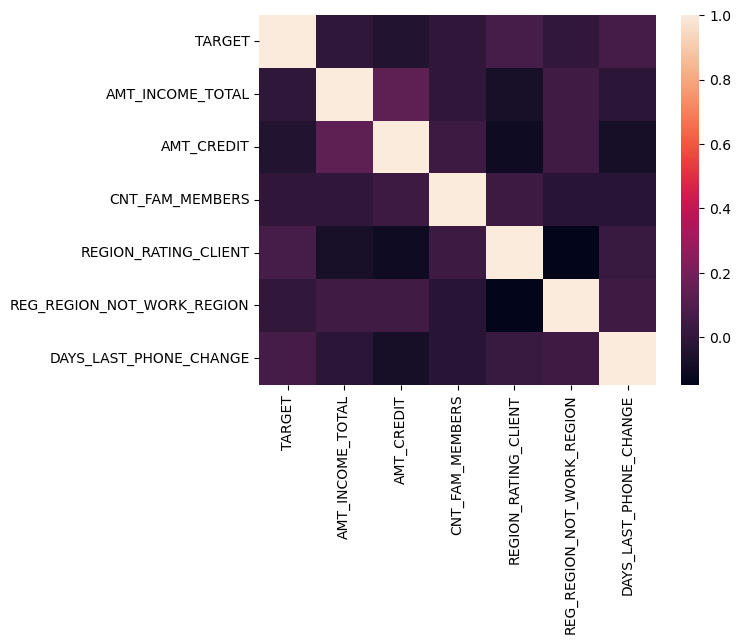

In [54]:
numerical_columns = df.select_dtypes(include='number').columns
sns.heatmap(df[numerical_columns].corr())

# Training and testing

In [55]:
df = df[df['CODE_GENDER'].isin(['M', 'F'])]
X = df.drop(columns=['TARGET'])
y = df['TARGET']  
categorical_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_EDUCATION_TYPE', 'OCCUPATION_TYPE']
numerical_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REG_REGION_NOT_WORK_REGION', 'DAYS_LAST_PHONE_CHANGE']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


## Random Forest

In [56]:
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)

print("Accuracy score for training data:", train_accuracy)
print("Accuracy score for testing data:", test_accuracy)
print("Precision score for training data:", train_precision)
print("Precision score for testing data:", test_precision)
print("Recall score for training data:", train_recall)
print("Recall score for testing data:", test_recall)

Accuracy score for training data: 0.9995973758378135
Accuracy score for testing data: 0.9088120881268021
Precision score for training data: 0.9986501079913607
Precision score for testing data: 0.14465408805031446
Recall score for training data: 0.9967663702506063
Recall score for testing data: 0.007751415475869506


### Decision Tree

In [57]:
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
train_precision = precision_score(y_train, y_pred_train)
test_precision = precision_score(y_test, y_pred_test)
train_recall = recall_score(y_train, y_pred_train)
test_recall = recall_score(y_test, y_pred_test)

print("Accuracy score for training data:", train_accuracy)
print("Accuracy score for testing data:", test_accuracy)
print("Precision score for training data:", train_precision)
print("Precision score for testing data:", test_precision)
print("Recall score for training data:", train_recall)
print("Recall score for testing data:", test_recall)

Accuracy score for training data: 0.9996921109347986
Accuracy score for testing data: 0.8325211820501738
Precision score for training data: 0.9997297297297297
Precision score for testing data: 0.10791744402985075
Recall score for training data: 0.9967663702506063
Recall score for testing data: 0.12476408735508224


In [58]:
joblib_file = "DT.pkl"
joblib.dump(pipeline, joblib_file)

['DT.pkl']

In [59]:
joblib_file = "DT.pkl"
loaded_pipeline = joblib.load(joblib_file)